[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaxMitre/Aplicaciones-Financieras/blob/main/Semana6/2_Pricing_con_Monte_Carlo.ipynb)


# Método de Montecarlo para valuación de opciones

Se buscará estimar el precio de una opción Europea de tipo call (European Call Option) 

En resumen, una opción es un contrato entre 2 entes, el precio de este contrato depende, entre otras cosas, del precio subyacente del activo. En especial, una opción Europea es en la que el comprador tiene el derecho, mas no obligación, de ejercer la compra de los valores.

# Resumen de Método MC (Montecarlo)

Es un método no detérminista para aproximar expresiones matemáticas complejas que son muy costosas de evaluar con exactitud.

Consiste en simular, con variables aleatorias que tengan cierta información de nuestro problema, muchas salidas de nuestro problema, asi como sus correspondientes probabilidades para aproximarnos a la solución real de un problema.

Entre mas casos se simulen el resultado será mejor, a cambio de costo computacional


# Dependencias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Clase Configuration:

Encargada de:
- Almacenará la configuración básica de nuestro modelo.


In [ ]:
class Configuration:
     def __init__(self, NumberOfScenarios, NumberOfTimesteps):
         self.NumberOfScenarios = NumberOfScenarios 
         self.NumberOfTimesteps = NumberOfTimesteps

# Clase OptionTrade

Almacenará información detallada sobre la opción. La utilizaremos, junto a un Movimiento Brwoniano Geométrico simulado, para calcular el precio del contrato tipo call.

In [ ]:
class OptionTrade:
  def __init__(self, stock_price, strike_price, risk_free_rate, volatility, time_to_maturity):
        self.stock_price=stock_price
        self.strike_price=strike_price
        self.risk_free_rate=risk_free_rate
        self.volatility=volatility
        self.time_to_maturity = time_to_maturity

# Clase GBMModel

Crea un simulador de Movimiento Browniano Geométrico

$$ 
S_T = S_0 \exp \left[ \left( \mu - \dfrac{\sigma^2}{2} \right) T + \sigma\epsilon\sqrt{T}  \right]
$$

Ésta ecuación es la que nos dará la simulación del precio del call al llevar a cabo simulaciones de variables aleatorias normales. Solucionar esta ecuación es bastante complejo, pero se puede hacer con una herramienta llamada ecuación de Black-Scholes.

In [ ]:
class GBMModel:
    def __init__(self, Configuration):
        self.Configuration = Configuration
        
    #simula factores de riesgo utilizando un GBM (Geometric Brownian Motion), una escuación diferencial estocástica
    def SimulateRiskFactor(self, trade):
        prices = []
        # En este ejemplo, solo nos importa un tiempo por ser una opción Europea
        timestep = 1
        for scenarioNumber in range(self.Configuration.NumberOfScenarios):
            normal_random_number = np.random.normal(0, 1)           
            drift = (trade.risk_free_rate-0.5*(trade.volatility**2)) *timestep
            
            uncertainty =trade.volatility*np.sqrt(timestep)*normal_random_number

            price = trade.stock_price * np.exp(drift+uncertainty)
            prices.append(price)    
        return prices

# Clase OptionTradePayoffPricer

Nos dará un precio estimado al promediar con el total de escenarios vistos

In [ ]:
class OptionTradePayoffPricer:
    def CalculatePrice(self, trade, prices_per_scenario):
        pay_offs = 0
        total_scenarios = len(prices_per_scenario)
        for i in range(total_scenarios):
            price = prices_per_scenario[i]
            pay_off = price - trade.strike_price
            if(pay_off>0): 
                pay_offs=pay_offs+pay_off
        
        discounted_price = (np.exp(-1.0*trade.risk_free_rate * trade.time_to_maturity)*pay_offs)
        result = discounted_price/total_scenarios
        return result

# Visualización

In [ ]:
def plot_scenario_paths(prices_per_scenario, trade):
    x=[]
    y=[]
    for i in prices_per_scenario:
            y.append(i)
            y.append(trade.stock_price)
            x.append(1)            
            x.append(0)            
            plt.plot(x, y)            
       
    plt.ylabel('Stock Value')
    plt.xlabel('Timestep')
    plt.show()

# clase MonteCarloEngineSimulator

Condensa las clases mencionadas anteriormente para entregarnos el precio esperado y las gráficas

In [ ]:
class MonteCarloEngineSimulator:
    # Inicializado con Configuration y Model
    def __init__(self, configuration, model):
        self.configuration = configuration
        self.model = model
        
    #Simula trades y calcula precios
    def Simulate(self, trade, tradePricer):
        prices_per_scenario = self.model.SimulateRiskFactor(trade)
        #Grafica escenarios
        plot_scenario_paths(prices_per_scenario, trade)
        price = tradePricer.CalculatePrice(trade, prices_per_scenario)
        
        return price

# Cantidad pequeña de simulaciones

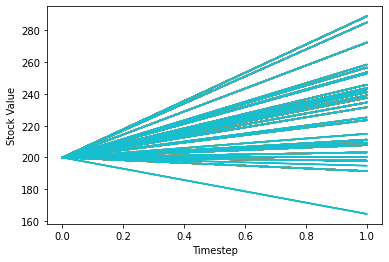

15.66433311690568


In [ ]:
# Prepara los datos
configuration = Configuration(30, 1) # config
trade = OptionTrade(200, 200, 0.15, 0.1,1) # trade
model = GBMModel(configuration)
tradePricer = OptionTradePayoffPricer()
simulator = MonteCarloEngineSimulator(configuration, model)
    
# Simula precio
price = simulator.Simulate(trade, tradePricer)
print(price)

In [ ]:
simulated_prices = simulator.model.SimulateRiskFactor(trade) # Precios simulados

(array([2., 0., 0., 0., 3., 3., 0., 0., 1., 1.]),
 array([195.17919136, 203.98737267, 212.79555399, 221.6037353 ,
        230.41191661, 239.22009793, 248.02827924, 256.83646056,
        265.64464187, 274.45282319, 283.2610045 ]),
 <a list of 10 Patch objects>)

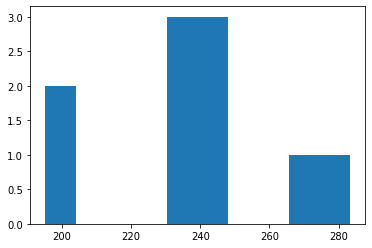

In [ ]:
plt.hist(simulated_prices)

# Más Simulaciones

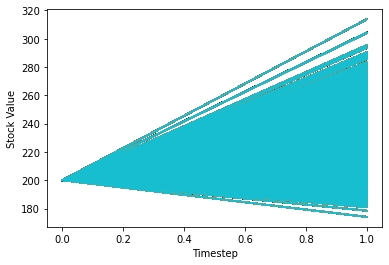

28.402862038750698


In [ ]:
# Prepara los datos
configuration = Configuration(1000, 1) # config
trade = OptionTrade(200, 200, 0.15, 0.1,1) # trade
model = GBMModel(configuration)
tradePricer = OptionTradePayoffPricer()
simulator = MonteCarloEngineSimulator(configuration, model)

# Simula precio
price = simulator.Simulate(trade, tradePricer)
print(price)

In [ ]:
simulated_prices = simulator.model.SimulateRiskFactor(trade) # Precios simulados

(array([  9.,  29., 101., 175., 254., 194., 144.,  58.,  27.,   9.]),
 array([166.2617206 , 180.21904894, 194.17637728, 208.13370562,
        222.09103396, 236.0483623 , 250.00569064, 263.96301898,
        277.92034732, 291.87767566, 305.83500401]),
 <a list of 10 Patch objects>)

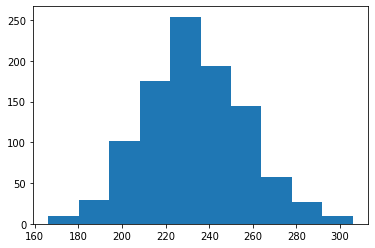

In [ ]:
plt.hist(simulated_prices)